### Overview:
In this notebook further exploratory data analysis was performed on the 2017 Divvy trip data incorporating inferential statistical methods

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import datetime as dt

In [2]:
df = pd.read_csv('Divvy_data_2017T.csv')

### The first section will explore correlations to help group Divvy stations by similiarities
This will allow us to make stocking predictions per station group according to the season/day later on

In [3]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

### Look for correlations between Station Capacity and Number of Trips

In [4]:
starts = df.groupby('start_capacity').count()
ends = df.groupby('end_capacity').count()


slope:  -1.10051114038e-05
pearson_r:  -0.246792456357


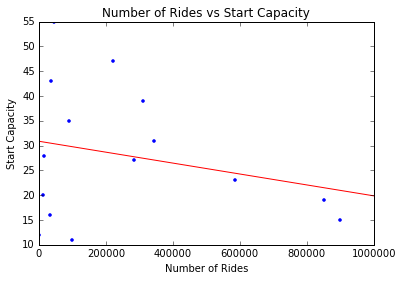

In [5]:
_ = plt.plot(starts.trip_id, starts.index, marker='.', linestyle='none')
_ = plt.xlabel('Number of Rides')
_ = plt.ylabel('Start Capacity')
_ = plt.title('Number of Rides vs Start Capacity')

# Perform a linear regression using np.polyfit(): slope, intercept
slope, intercept = np.polyfit(starts.trip_id, starts.index,1)

corr = pearson_r(starts.trip_id, starts.index)
print 'slope: ', slope
print 'pearson_r: ', corr

# Plot regression line
x = np.array([0,1000000])
y = slope * x + intercept

lat = plt.plot(x, y, color='red')

plt.show()

slope:  -1.1083403317e-05
pearson_r:  -0.251666462577


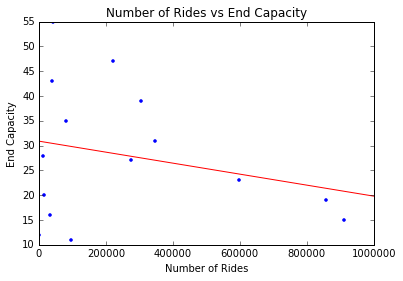

In [6]:
_ = plt.plot(ends.trip_id, ends.index, marker='.', linestyle='none')
_ = plt.xlabel('Number of Rides')
_ = plt.ylabel('End Capacity')
_ = plt.title('Number of Rides vs End Capacity')

# Perform a linear regression using np.polyfit(): slope, intercept
slope, intercept = np.polyfit(ends.trip_id, ends.index,1)

corr = pearson_r(ends.trip_id, ends.index)
print 'slope: ', slope
print 'pearson_r: ', corr

# Plot regression line
x = np.array([0,1000000])
y = slope * x + intercept

_ = plt.plot(x, y, color='red')

plt.show()

### Look for correlations between Latitude / Longitude and Number of Trips

In [7]:
lats = df.groupby('start_latitude').count()
lons = df.groupby('start_longitude').count()

slope:  9.11620743949e-07
pearson_r:  0.123793962342


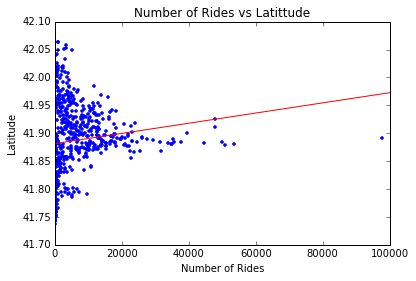

In [8]:
_ = plt.plot(lats.trip_id, lats.index, marker='.', linestyle='none')
_ = plt.xlabel('Number of Rides')
_ = plt.ylabel('Latitude')
_ = plt.title('Number of Rides vs Latittude')

# Perform a linear regression using np.polyfit(): slope, intercept
slope, intercept = np.polyfit(lats.trip_id, lats.index,1)

corr = pearson_r(lats.trip_id, lats.index)
print 'slope: ', slope
print 'pearson_r: ', corr

# Plot regression line
x = np.array([0,100000])
y = slope * x + intercept

_ = plt.plot(x, y, color='red')

plt.show()

slope:  1.30159700324e-06
pearson_r:  0.274355503297


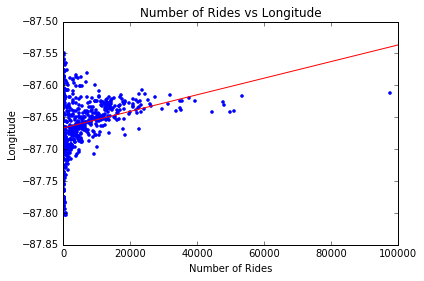

In [9]:
_ = plt.plot(lons.trip_id, lons.index, marker='.', linestyle='none')
_ = plt.xlabel('Number of Rides')
_ = plt.ylabel('Longitude')
_ = plt.title('Number of Rides vs Longitude')



# Perform a linear regression using np.polyfit(): slope, intercept
slope, intercept = np.polyfit(lons.trip_id, lons.index,1)

corr = pearson_r(lons.trip_id, lons.index)
print 'slope: ', slope
print 'pearson_r: ', corr

# Plot regression line
x = np.array([0,100000])
y = slope * x + intercept

_ = plt.plot(x, y, color='red')

plt.show()

### Divide stations into tiers based on trip traffic

With no strong correlations found between capacity and number of trips, or longitude/latitude and number of trips, it may be best to divide stations into a few tiers based on their number of total rides. This will allow for recommendations to be made based on stations being used at different frequencies.

In [10]:
#get a count of total trips from each station in 2017
sstations = df.groupby('start_station_id').count()
sstations.trip_id.describe()

count      585.000000
mean      6545.225641
std       9114.864108
min          3.000000
25%        591.000000
50%       3441.000000
75%       9628.000000
max      97569.000000
Name: trip_id, dtype: float64

In [11]:
#create a df for start stations so a group column can be added
ss = pd.DataFrame(sstations.trip_id)

ss.rename(columns={'trip_id': 'start_station_trip_count'}, inplace=True)
ss['start_station_id'] = ss.index

In [12]:
#create a function to apply to ss to create a group column
def f(df):
    if df.start_station_trip_count < 591:
        val= 4
    elif df.start_station_trip_count < 3441:
        val = 3
    elif df.start_station_trip_count < 9628:
        val = 2
    elif df.start_station_trip_count >= 9628:
        val = 1
    return val

#create a new group column
ss['group'] = ss.apply(f, axis=1)

In [13]:
# merge ss with original df on start_station_id
df = pd.merge(df, ss, on='start_station_id', how='left')

#pd.df.drop('start_station_trip_count')

In [14]:
df.start_time = pd.to_datetime(df.start_time, format='%Y-%m-%d  %H:%M:%S')

In [15]:
df = df.set_index('start_time')

In [16]:
df['day_of_year'] = df.index.dayofyear
df['week_of_year'] = df.index.week

In [17]:
group1 = df.loc[df.group == 1]
group2 = df.loc[df.group == 2]
group3 = df.loc[df.group == 3]
group4 = df.loc[df.group == 4]

In [18]:
print 'Average Start Station Capacity'
print 'Group 1', np.mean(group1.start_capacity)
print 'Group 2',np.mean(group2.start_capacity)
print 'Group 3',np.mean(group3.start_capacity)
print 'Group 4',np.mean(group4.start_capacity)
print ''
print 'Average End Station Capacity'
print 'Group 1',np.mean(group1.end_capacity)
print 'Group 2',np.mean(group2.end_capacity)
print 'Group 3',np.mean(group3.end_capacity)
print 'Group 4',np.mean(group4.end_capacity)


Average Start Station Capacity
Group 1 27.5882739203
Group 2 17.6941599153
Group 3 15.2839083074
Group 4 13.644185503

Average End Station Capacity
Group 1 25.9218887618
Group 2 21.2396421509
Group 3 18.6819500757
Group 4 15.8927581717


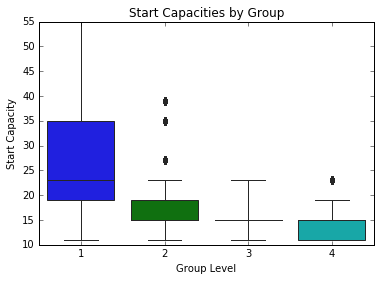

In [19]:
sns.boxplot(x='group', y='start_capacity', data=df)
plt.xlabel('Group Level')
plt.ylabel('Start Capacity')
plt.title('Start Capacities by Group')

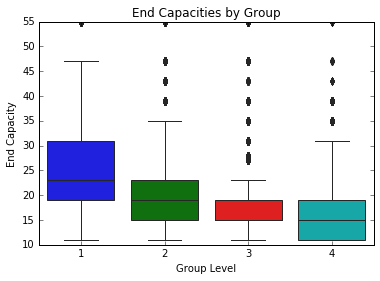

In [20]:
sns.boxplot(x='group', y='end_capacity', data=df)
plt.xlabel('Group Level')
plt.ylabel('End Capacity')
plt.title('End Capacities by Group')

### How does the ratio of bike in vs bikes out of a station compare in the different group levels?

In [21]:
#count number of rides out per station for 2017
rout = df.groupby(['start_station_id']).count()

#count number of rides in per station for 2017
rin = df.groupby(['end_station_id']).count()

In [22]:
# get the infromation for trips in and trips out ready for a join
i = pd.DataFrame(rin.trip_id)
o = pd.DataFrame(rout.trip_id)
i.rename(columns={'trip_id': 'trips_in'}, inplace=True)
o.rename(columns={'trip_id': 'trips_out'}, inplace=True)
i.index.names = ['station_id']
o.index.names= ['station_id']

In [23]:
# join trips in and out into one dataframe
io = i.join(o, how='outer')
io['in_out_ratio'] = io.trips_in / io.trips_out
io = io.fillna(0)

In [24]:
#combine with other df's to get capacity and group information 
total_io = io.join(ss)
cap = df[['start_station_id','start_capacity']]
cap = cap.drop_duplicates('start_station_id')
cap = cap.set_index('start_station_id')

total_io = total_io.join(cap)
total_io = total_io.drop(['start_station_trip_count', 'start_station_id'], axis=1)
total_io.rename(columns={'start_capacity': 'capacity'}, inplace=True)

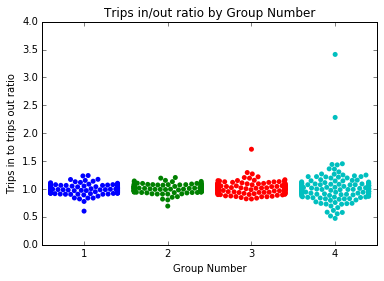

In [25]:
_ = sns.swarmplot(x = 'group', y ='in_out_ratio', data=total_io)
_ = plt.xlabel('Group Number')
_ = plt.ylabel('Trips in to trips out ratio')
_ = plt.title('Trips in/out ratio by Group Number')

slope:  0.00825532130621
pearson_r:  0.0576079135014


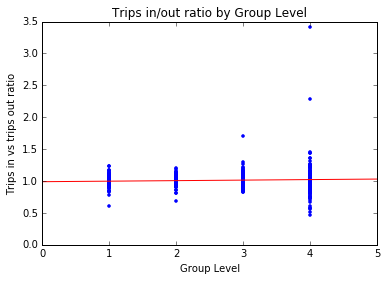

In [26]:
#look at correlation between groups and in/out ratio
_ = plt.plot(total_io.group, total_io.in_out_ratio, marker='.', linestyle='none')
_ = plt.xlabel('Group Level')
_ = plt.ylabel('Trips in vs trips out ratio')
_ = plt.title('Trips in/out ratio by Group Level')

# Perform a linear regression using np.polyfit(): slope, intercept
slope, intercept = np.polyfit(total_io.group, total_io.in_out_ratio,1)

corr = pearson_r(total_io.group, total_io.in_out_ratio)
print 'slope: ', slope
print 'pearson_r: ', corr

# Plot regression line
x = np.array([0,5])
y = slope * x + intercept

_ = plt.plot(x, y, color='red')

plt.show()

### Is there a correlation between station capacity and in/out ratio?

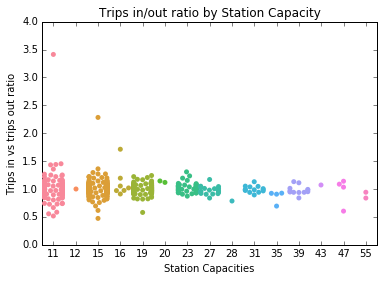

In [27]:
_ = sns.swarmplot(x = 'capacity', y ='in_out_ratio', data=total_io)
_ = plt.xlabel('Station Capacities')
_ = plt.ylabel('Trips in vs trips out ratio')
_ = plt.title('Trips in/out ratio by Station Capacity')

slope:  -0.00196730522216
pearson_r:  -0.0818490335559


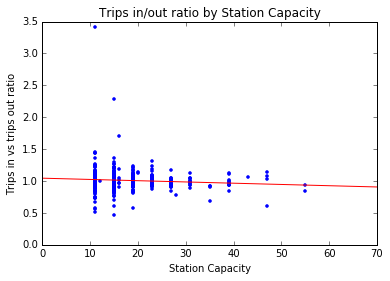

In [28]:
#look at correlation between groups and in/out ratio
_ = plt.plot(total_io.capacity, total_io.in_out_ratio, marker='.', linestyle='none')
_ = plt.xlabel('Station Capacity')
_ = plt.ylabel('Trips in vs trips out ratio')
_ = plt.title('Trips in/out ratio by Station Capacity')

# Perform a linear regression using np.polyfit(): slope, intercept
slope, intercept = np.polyfit(total_io.capacity, total_io.in_out_ratio,1)

corr = pearson_r(total_io.capacity, total_io.in_out_ratio)
print 'slope: ', slope
print 'pearson_r: ', corr

# Plot regression line
x = np.array([0,70])
y = slope * x + intercept

_ = plt.plot(x, y, color='red')

plt.show()

### The next section will focus on testing hypotheses from EDA:

- Busiest hour of the day is attributed to typical commuting hours
- The number of trips are higher in the PM hours 
- The number of trips are higher on the weekend days in the busy season
- The number of trips are higher on the weekday days in the slow season
- The average trip durations are higher on the weekend than weekdays
- The average trip durations are higher in the busy season 
- There is not a significant difference in the average in/out ratios between highest traffic group and lowest traffic group
- There is not a significant difference in average in/out ratios between highest station capacity and lowest station
- There is not a significant difference in average in/out ratio between the high and low season
- There is not a significant difference in average in/out ratio between weekends and weekdays
- There is significant difference in average station capacities between group levels 

In [29]:
#create a function to draw bootstrap replicates
def bootstrap_replicate_1D(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1D(data, func)

    return bs_replicates

### 1. Test if the busiest hour of the day is attributed to typical commuting hours

Null hypothesis: The average number of trips during the 5pm hour for weekdays = the average number of trips during the 5pm hour for weekend days

Alternative hypothesis: The average number of trips during the 5pm hour for weekdays != the average number of trips during the 5pm hour for weekend days

significance level = .05

In [30]:
weekday = df.loc[df.day_of_week < 5]
weekend = df.loc[df.day_of_week >= 5]

In [31]:
weekday_hours = weekday.groupby(['day_of_year','hour']).count()
weekend_hours = weekend.groupby(['day_of_year','hour']).count()

In [32]:
total_weekday = np.array(weekday_hours.trip_id[:,17])
total_weekend = np.array(weekend_hours.trip_id[:,17])

Is there a significant difference in average trip numbers for the 5pm hour on weekdays vs weekends?

In [33]:
sp.stats.ttest_ind(total_weekday, total_weekend)

Ttest_indResult(statistic=8.2769686656119283, pvalue=2.4420604517896118e-15)

The t test assumed the means are identical, and the results allows us to reject that hypothesis. 

What is the probability that the weekdays average at 5pm is greater than the weekend average at 5pm?  

In [34]:
# Compute observed difference of means
diff_means = np.mean(total_weekday) - np.mean(total_weekend)

# Compute 10,000 bootstrap replicates
bs_replicates_wd = draw_bs_reps(total_weekday, np.mean, size=10000)
bs_replicates_we = draw_bs_reps(total_weekend, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates1 = bs_replicates_wd - bs_replicates_we

# Compute p value
p = np.sum(bs_replicates1 >= 0) / float(len(bs_replicates1))
print 'p-value =', p

p-value = 1.0


In [35]:
conf95 = np.percentile(bs_replicates1, [2.5,97.5])
print '95% confidence interval: ', conf95
print 'Observed difference: ', diff_means

95% confidence interval:  [ 543.27735806  833.47624542]
Observed difference:  688.356776557


The results show that we can be confident that the average trip count at 5pm on the weekdays will be higher than the average trip count at 5pm on weekend days. This supports the idea that busiest hour of the day throughout the year is attributed to typical commuting hours.

### 2. Test if the PM hours truly have higher trip counts than AM hours

Null Hypothesis: The average trip count for PM hours = the average trip count in AM hours

Alternative Hypothesis: The average trip count for PM hours != the average trip count in AM hours

Significance level: .05

In [36]:
#get the count of trips for am and pm hours for every day of 2017
ampm = df.groupby(['day_of_year','part_day']).count()

In [37]:
#create arrays based off the count of am and pm trips to use in bootstrap method
am = np.array(ampm.trip_id[:,'AM'])
pm = np.array(ampm.trip_id[:,'PM'])

In [38]:
sp.stats.ttest_ind(am, pm)

Ttest_indResult(statistic=-15.062862909068603, pvalue=7.8295533248265518e-45)

The t test assumed the means are identical, and the results allows us to reject that hypothesis. 

What is the probability that the pm average is greater than the am average trip count?

In [39]:
# Compute observed difference of means
diff_means2 = np.mean(pm) - np.mean(am)

# Compute 10,000 bootstrap replicates
bs_replicates_pm = draw_bs_reps(pm, np.mean, size=10000)
bs_replicates_am = draw_bs_reps(am, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates2 = bs_replicates_pm - bs_replicates_am

# Compute p value
p = np.sum(bs_replicates2 >= 0) / float(len(bs_replicates2))
print 'p-value =', p

p-value = 1.0


In [40]:
conf95 = np.percentile(bs_replicates2, [2.5,97.5])
print '95% confidence interval: ', conf95
print 'Observed difference: ', diff_means2

95% confidence interval:  [ 3268.46815068  4236.3189726 ]
Observed difference:  3754.17808219


We fail to reject the null hypothesis and are confident that the average number of trips for PM hours is higher than that of AM hours.

### 3. Test if the number of trips are higher on the weekend days in the busy season

Null Hypothesis: The average trip count for weekend days = the average trip count per day for weekday days in high season

Alternative Hypothesis: The average trip count for weekend days != the average trip count for weekday days in high season

Significance level: .05

In [41]:
high = df['2017-06-01':'2017-09-30']

In [42]:
hweekdays = high.loc[high.day_of_week < 5]
hweekend = high.loc[high.day_of_week >= 5]

In [43]:
hweekdays2 = hweekdays.groupby('day_of_year').count()
hweekend2 = hweekend.groupby('day_of_year').count()

In [44]:
#create arrays based off the count of weekday and weekend trips to use in bootstrap method
hweekday3 = np.array(hweekdays2.trip_id)
hweekend3 = np.array(hweekend2.trip_id)

In [45]:
sp.stats.ttest_ind(hweekday3, hweekend3)

Ttest_indResult(statistic=-1.3755100760279759, pvalue=0.17153558407918659)

The t test assumed the means are identical, and the results below do not allow us to reject that hypothesis. Because the results are above our signficiance level, there isn't signficant evidence for us to make the claim that the average number of trips are higher or lower on weekends during the busy season.

### 4. Test if the number of trips are higher on the weekdays in the slow season

Null Hypothesis: The average trip count for weekdays = the average trip count for weekend days in slow season

Alternative Hypothesis: The average trip count for weekday days != the average trip count for weekend days in slow season

Significance level: .05

In [46]:
#get the count of trips for weekdays and weekends for every week in slow season

#group data by low months, and join the two low timeframes (Jan-Mar, and Nov-Dec) 
slow1 = df['2017-01-01':'2017-03-31']
slow2 = df['2017-11-01':'2017-12-31']
slow = pd.concat([slow1,slow2])

sweekdays = slow.loc[slow.day_of_week < 5]
sweekend = slow.loc[slow.day_of_week >= 5]

In [47]:
sweekdays2 = sweekdays.groupby('day_of_year').count()
sweekend2 = sweekend.groupby('day_of_year').count()

#create arrays based off the count of weekday and weekend trips to use in bootstrap method
sweekday3 = np.array(sweekdays2.trip_id)
sweekend3 = np.array(sweekend2.trip_id)


In [48]:
sp.stats.ttest_ind(sweekday3, sweekend3)

Ttest_indResult(statistic=5.2573472473029579, pvalue=4.9815150122745131e-07)

The t test assumed the means are identical, and the results allows us to reject that hypothesis. 

What is the probability that the pm average is greater than the am average trip count?

In [49]:
# Compute observed difference of means
diff_means_s = np.mean(sweekday3) - np.mean(sweekend3)

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_weekdays = draw_bs_reps(sweekday3, np.mean, size=10000)
bs_replicates_weekends = draw_bs_reps(sweekend3, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates1s = bs_replicates_weekdays - bs_replicates_weekends

# Compute p value
p = np.sum(bs_replicates1s >= 0) / float(len(bs_replicates1s))
print 'p-value =', p

p-value = 1.0


In [50]:
conf95 = np.percentile(bs_replicates1s, [2.5,97.5])
print '95% confidence interval: ', conf95
print 'Observed difference: ', diff_means_s

95% confidence interval:  [ 1291.29321167  3055.10090439]
Observed difference:  2222.61024978


We fail to reject the null hypothesis and are confident that the average number of trips for weekdays is higher than that of weekend trips in the slow season.

### 5. Test if the average trip durations are higher on the weekends vs weekdays

Null Hypothesis: The average trip duration for weekdays = the average trip duration for weekend days

Alternative Hypothesis: The average trip duration for weekday days != the average trip duration for weekend days 

Significance level: .05

In [51]:
weekday_durations = weekday.groupby(['day_of_year']).mean()
weekend_durations = weekend.groupby(['day_of_year']).mean()

avg_wdd = weekday_durations.trip_duration
avg_wed = weekend_durations.trip_duration

In [52]:
sp.stats.ttest_ind(avg_wdd, avg_wed)

Ttest_indResult(statistic=-11.971366901885748, pvalue=4.6098048816966565e-28)

The t test assumed the means are identical, and the results allows us to reject that hypothesis. 

What is the probability that the weekend average duration is greater than the weekday average trip duration?

In [53]:
# Compute observed difference of means
diff_means_dur = np.mean(avg_wed) - np.mean(avg_wdd)

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_wed = draw_bs_reps(avg_wed, np.mean, size=10000)
bs_replicates_wdd = draw_bs_reps(avg_wdd, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates1_dur = bs_replicates_wed - bs_replicates_wdd

# Compute p value
p = np.sum(bs_replicates1_dur >= 0) / float(len(bs_replicates1_dur))
print 'p-value =', p

p-value = 1.0


In [54]:
conf95 = np.percentile(bs_replicates1_dur, [2.5,97.5])
print '95% confidence interval: ', conf95
print 'Observed difference: ', diff_means_dur

95% confidence interval:  [ 3.76271773  5.69146754]
Observed difference:  4.73799856733


We fail to reject the null hypothesis and are confident that the average trip duration for weekends is higher than that of weekdays.

### 6. Test if the average trip durations are higher in the high season 

Null Hypothesis: The average trip duration for the high season = the average trip duration for the slow season

Alternative Hypothesis: The average trip duration for the high season = the average trip duration for the slow season 

Significance level: .05

In [55]:
high_durations = high.groupby(['day_of_year']).mean()
slow_durations = slow.groupby(['day_of_year']).mean()

avg_hd = high_durations.trip_duration
avg_sd = slow_durations.trip_duration

In [56]:
sp.stats.ttest_ind(avg_wdd, avg_wed)

Ttest_indResult(statistic=-11.971366901885748, pvalue=4.6098048816966565e-28)

The t test assumed the means are identical, and the results allows us to reject that hypothesis. 

What is the probability that the high season average duration is greater than the slow season average trip duration?

In [57]:
# Compute observed difference of means
diff_means_dhs = np.mean(avg_hd) - np.mean(avg_sd)

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_hd = draw_bs_reps(avg_hd, np.mean, size=10000)
bs_replicates_sd = draw_bs_reps(avg_sd, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates1_dhs = bs_replicates_hd - bs_replicates_sd

# Compute p value
p = np.sum(bs_replicates1_dhs >= 0) / float(len(bs_replicates1_dhs))
print 'p-value =', p

p-value = 1.0


In [58]:
conf95 = np.percentile(bs_replicates1_dhs, [2.5,97.5])
print '95% confidence interval: ', conf95
print 'Observed difference: ', diff_means_dhs

95% confidence interval:  [ 4.96644496  6.39320107]
Observed difference:  5.67337698338


We fail to reject the null hypothesis and are confident that the average trip duration for the high season is higher than that of the slow season.

### 7. Is there a difference in average in/out ratios between highest traffic group (1) and lowest traffic group (4)?

Null Hypothesis: The average in/out ratio for the highest traffic group = the average in/out ratio for the lowest traffic group

Alternative Hypothesis: The average in/out ratio for the highest traffic group != the average in/out ratio for the lowest traffic group

Significance level: .05

In [59]:
g1 = total_io.loc[total_io.group == 1]
r1 = g1.in_out_ratio

g4 = total_io.loc[total_io.group == 4]
r4 = g4.in_out_ratio

r1 = np.array(r1)
r4 = np.array(r4)

In [60]:
sp.stats.ttest_ind(r1, r4)

Ttest_indResult(statistic=-1.0240120464630789, pvalue=0.30668007561982935)

The t test assumed the means are identical, and the results above do not allow us to reject that hypothesis.

### 8. Is there a difference in average in/out ratios between highest station capacity (55) and station capacity (11)?

Null Hypothesis: The average in/out ratio for the highest station capacity = the average in/out ratio for the lowest station capacity

Alternative Hypothesis: The average in/out ratio for the highest station capacity != the average in/out ratio for the lowest station capacity


Significance level: .05

In [61]:
cap11 = total_io.loc[total_io.capacity == 11]
r11 = cap11.in_out_ratio

cap55 = total_io.loc[total_io.capacity == 55]
r55 = cap55.in_out_ratio

r11 = np.array(r11)
r55 = np.array(r55)

In [62]:
sp.stats.ttest_ind(r11, r55)

Ttest_indResult(statistic=0.63829946140396709, pvalue=0.52464255954763017)

The t test assumed the means are identical, and the results above do not allow us to reject that hypothesis.

### Find the in/out ratios in high and slow seasons

In [63]:
#count number of rides in high season
routh = high.groupby(['start_station_id']).count()

#count number of rides in high season
rinh = high.groupby(['end_station_id']).count()

In [64]:
# get the infromation for trips in and trips out ready for a join
ih = pd.DataFrame(rinh.trip_id)
oh = pd.DataFrame(routh.trip_id)
ih.rename(columns={'trip_id': 'trips_in'}, inplace=True)
oh.rename(columns={'trip_id': 'trips_out'}, inplace=True)
ih.index.names = ['station_id']
oh.index.names= ['station_id']

# join trips in and out into one dataframe
ioh = ih.join(oh, how='outer')
ioh['in_out_ratio'] = ioh.trips_in / ioh.trips_out
ioh = ioh.fillna(0)

In [65]:
#count number of rides out in slow season
routl = slow.groupby(['start_station_id']).count()

#count number of rides in slow season
rinl = slow.groupby(['end_station_id']).count()

In [66]:
# get the infromation for trips in and trips out ready for a join
il = pd.DataFrame(rinl.trip_id)
ol = pd.DataFrame(routl.trip_id)
il.rename(columns={'trip_id': 'trips_in'}, inplace=True)
ol.rename(columns={'trip_id': 'trips_out'}, inplace=True)
il.index.names = ['station_id']
ol.index.names= ['station_id']

# join trips in and out into one dataframe
iol = il.join(ol, how='outer')
iol['in_out_ratio'] = iol.trips_in / iol.trips_out
iol = iol.fillna(0)

### 9. Is there a difference in average in/out ratios between high season and slow season?


Null Hypothesis: The average in/out ratio for the high season = the average in/out ratio for the slow season

Alternative Hypothesis: The average in/out ratio for the high season != the average in/out ratio for the slow season

Significance level: .05

In [67]:
highr = ioh.in_out_ratio
slowr = iol.in_out_ratio

rh = np.array(highr)
rl = np.array(slowr)

sp.stats.ttest_ind(rh, rl)

Ttest_indResult(statistic=1.8546033891219362, pvalue=0.063905202015036675)

The t test assumed the means are identical, and the results do not allows us to reject that hypothesis. 

### Find the in/out ratios in high and slow seasons


In [68]:
#count number of rides for weekdays
routwd = weekday.groupby(['start_station_id']).count()

#count number of rides for weekdays
rinwd= weekday.groupby(['end_station_id']).count()

In [69]:
# get the infromation for trips in and trips out ready for a join
iwd = pd.DataFrame(rinwd.trip_id)
owd = pd.DataFrame(routwd.trip_id)
iwd.rename(columns={'trip_id': 'trips_in'}, inplace=True)
owd.rename(columns={'trip_id': 'trips_out'}, inplace=True)
iwd.index.names = ['station_id']
owd.index.names= ['station_id']

# join trips in and out into one dataframe
iowd = iwd.join(owd, how='outer')
iowd['in_out_ratio'] = iowd.trips_in / iowd.trips_out
iowd = iowd.fillna(0)

In [70]:
#count number of rides on weekend days
routwe = weekend.groupby(['start_station_id']).count()

#count number of rides in weekend days
rinwe = weekend.groupby(['end_station_id']).count()

In [71]:
# get the infromation for trips in and trips out ready for a join
iwe = pd.DataFrame(rinwe.trip_id)
owe = pd.DataFrame(routwe.trip_id)
iwe.rename(columns={'trip_id': 'trips_in'}, inplace=True)
owe.rename(columns={'trip_id': 'trips_out'}, inplace=True)
iwe.index.names = ['station_id']
owe.index.names= ['station_id']

# join trips in and out into one dataframe
iowe = iwe.join(owe, how='outer')
iowe['in_out_ratio'] = iowe.trips_in / iowe.trips_out
iowe = iowe.fillna(0)

### 10. Is there a difference in average in/out ratios between weekends and weekdays?

Null Hypothesis: The average in/out ratio for the weekends = the average in/out ratio for weekdays

Alternative Hypothesis: The average in/out ratio for weekends != the average in/out ratio for weekdays

Significance level: .05

In [72]:
weekendr = iowe.in_out_ratio
weekdayr = iowd.in_out_ratio

rwe = np.array(weekendr)
rwd = np.array(weekdayr)

sp.stats.ttest_ind(rwe, rwd)

Ttest_indResult(statistic=-1.3409476661538016, pvalue=0.18019860443844965)

The t test assumed the means are identical, and the results above do not allow us to reject that hypothesis.

### 11. Is there a difference in average station capacities between the highest and lowest traffic group level?

Null Hypothesis: The average station capacity for the highest traffic group = the average station capacity for the lowest traffic group

Alternative Hypothesis: The average station capacity for the highest traffic group != the average station capacity for the lowest traffic group

Significance level: .05

In [73]:
g1c = np.array(group1.start_capacity)
g4c = np.array(group4.start_capacity)

g1ec = np.array(group1.end_capacity)
g4ec = np.array(group4.end_capacity)


In [74]:
sp.stats.ttest_ind(g1c, g4c)

Ttest_indResult(statistic=237.13718466524881, pvalue=0.0)

In [75]:
sp.stats.ttest_ind(g1ec, g4ec)

Ttest_indResult(statistic=166.40475113349163, pvalue=0.0)

Both t test assumed the means are identical, and the results above cause us to reject the null hypothesis.